In [1]:
# Composed of agents

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
eyes = [2.25,3.75,5,5,4] 
nose = [3,3,6]
mouth = [2.5,3,3.5, 1.15,1,1.15,8]
target_gene = np.array(eyes + nose + mouth)

In [4]:
target_gene

array([2.25, 3.75, 5.  , 5.  , 4.  , 3.  , 3.  , 6.  , 2.5 , 3.  , 3.5 ,
       1.15, 1.  , 1.15, 8.  ])

In [5]:
def draw_face(target):
    plt.plot([target[0],target[1]], [target[2],target[3]], 'go', markersize=target[4]*10)
    plt.plot(target[5], target[6], 'r^', markersize=target[7]*10)
    plt.plot([target[8],target[9],target[10]], [target[11],target[12],target[13]], 'b', linewidth=target[14])
    plt.tight_layout()

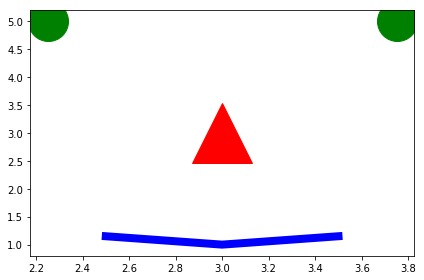

In [6]:
draw_face(target_gene)

# Genotype
 - 15 numbers to create that face

In [7]:
target_gene

array([2.25, 3.75, 5.  , 5.  , 4.  , 3.  , 3.  , 6.  , 2.5 , 3.  , 3.5 ,
       1.15, 1.  , 1.15, 8.  ])

In [8]:
m = len(target_gene)
print(m)

15


In [9]:
def create_gene(M = m):
    return np.random.rand(m) * 10

In [10]:
my_gene = create_gene()
my_gene

array([5.46598428, 9.48798729, 1.07416181, 0.47392234, 0.2850206 ,
       0.9837758 , 1.36097984, 5.4839611 , 3.36952672, 4.82999267,
       9.96668927, 7.47726647, 8.19950125, 6.26450289, 5.55520918])

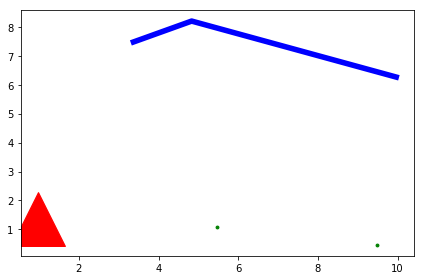

In [11]:
draw_face(my_gene)

# Fitness
 - How sucessful the gene of the agent
 - Euclidean Distance measures the error
 - similarity (fitness) is the inverse of distance
 
$$ Fitness(v) = \frac{1}{1 + dist(v, target)} $$
    

In [12]:
def fitness(v):
    error = (target_gene - v)
    return 1 / (1 + np.dot(error, error))

In [13]:
fitness(my_gene)

0.0036912786707797487

In [14]:
fitness(target_gene)

1.0

# Population

In [15]:
N = 4
population = {i:create_gene() for i in range(N)}

In [16]:
population

{0: array([0.82734702, 5.44529844, 2.51445111, 9.63852564, 5.19975605,
        1.64919511, 6.63033764, 9.09257138, 6.06190665, 5.24309893,
        4.65996684, 3.73452267, 5.86928867, 2.70956542, 6.67835649]),
 1: array([7.06751183, 0.04462872, 5.85776107, 4.43431693, 0.50032872,
        4.31299095, 1.74238133, 2.66695846, 9.31697787, 2.76131966,
        0.07444219, 1.30507403, 5.02864341, 5.27540075, 8.04906766]),
 2: array([5.74283216, 5.46875428, 9.13645363, 4.38119233, 1.19924388,
        5.11231218, 4.57457866, 2.25143952, 4.44029468, 7.37303231,
        8.16250138, 8.85871107, 7.7423158 , 1.66022655, 3.39193852]),
 3: array([7.04979931, 7.73736461, 5.73108072, 2.43889577, 1.82155852,
        6.12164494, 2.88996824, 6.41949027, 2.46802552, 9.26300001,
        6.41869355, 1.04688273, 4.50905226, 0.44778103, 2.5209437 ])}

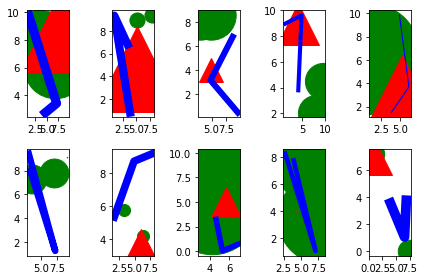

In [17]:
N = 10
population = {i:create_gene() for i in range(N)}

fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(population[i])

# Selection
 - who are the successful agents

In [18]:
success = {agent_id: fitness(agent_genome) for agent_id, agent_genome in population.items()}

In [19]:
success

{0: 0.0041940083157733345,
 1: 0.005055790540031198,
 2: 0.005836252096417434,
 3: 0.003436517026253189,
 4: 0.005125694071141982,
 5: 0.003646780652218551,
 6: 0.005134161850915352,
 7: 0.009354216838303389,
 8: 0.004009550436915198,
 9: 0.008070624821715423}

In [20]:
total_success = sum(success.values())
total_success

0.05386359664968505

In [21]:
reproduction_probability = {agent_id: success[agent_id]/total_success for agent_id in success.keys()}

In [22]:
reproduction_probability

{0: 0.07786350293408893,
 1: 0.09386284716397156,
 2: 0.10835243948477696,
 3: 0.0638003631395692,
 4: 0.09516063519631218,
 5: 0.06770399451667278,
 6: 0.09531784303797271,
 7: 0.1736649132277743,
 8: 0.07443896594934574,
 9: 0.14983449534951568}

In [23]:
pr = [reproduction_probability[agent_id] for agent_id in range(N)]
select = np.random.choice(N, 2, replace= False, p=pr)
select

array([0, 6])

In [24]:
def selection(population):
    success = {agent_id: fitness(agent_genome) for agent_id, agent_genome in population.items()}
    total_success = sum(success.values())
    reproduction_probability = {agent_id: success[agent_id]/total_success for agent_id in success.keys()}
    pr = [reproduction_probability[agent_id] for agent_id in range(N)]
    select = np.random.choice(N, 2, replace= False, p=pr)
    return select

In [25]:
selection(population)

array([3, 9])

# Crossover

In [26]:
parent0 = population[select[0]]
parent1 = population[select[1]]

In [27]:
parent0

array([6.74386504, 3.38563182, 6.01199846, 7.95971824, 6.24687734,
       9.3981844 , 9.09423354, 9.47531864, 4.70419284, 7.13405392,
       1.06854659, 2.73649998, 3.40702651, 9.78917391, 9.14632728])

In [28]:
parent1

array([3.33235567, 6.29511531, 5.76253082, 4.16619719, 1.20759513,
       6.04069481, 3.26768666, 4.39265575, 1.68111095, 4.90972861,
       7.90886951, 5.32508118, 8.71034156, 9.1717932 , 7.59527561])

In [29]:
cut = np.random.randint(m)

child0 = np.hstack((parent0[:cut],parent1[cut:]))
child1 = np.hstack((parent1[:cut],parent0[cut:]))

In [30]:
child0

array([6.74386504, 3.38563182, 6.01199846, 7.95971824, 6.24687734,
       9.3981844 , 9.09423354, 9.47531864, 4.70419284, 7.13405392,
       7.90886951, 5.32508118, 8.71034156, 9.1717932 , 7.59527561])

In [31]:
child1

array([3.33235567, 6.29511531, 5.76253082, 4.16619719, 1.20759513,
       6.04069481, 3.26768666, 4.39265575, 1.68111095, 4.90972861,
       1.06854659, 2.73649998, 3.40702651, 9.78917391, 9.14632728])

In [32]:
def crossover(selectedParents):
    parent0 = population[selectedParents[0]]
    parent1 = population[selectedParents[1]]
    
    cut = np.random.randint(m)
    child0 = np.hstack((parent0[:cut],parent1[cut:]))
    child1 = np.hstack((parent1[:cut],parent0[cut:]))
    return child0, child1

In [33]:
crossover(select)

(array([3.33235567, 6.29511531, 5.76253082, 4.16619719, 1.20759513,
        6.04069481, 3.26768666, 4.39265575, 1.68111095, 4.90972861,
        7.90886951, 5.32508118, 8.71034156, 9.1717932 , 7.59527561]),
 array([6.74386504, 3.38563182, 6.01199846, 7.95971824, 6.24687734,
        9.3981844 , 9.09423354, 9.47531864, 4.70419284, 7.13405392,
        1.06854659, 2.73649998, 3.40702651, 9.78917391, 9.14632728]))

# Mutation

In [34]:
def mutation(child, p = 0.05):
    mutation_point = np.random.randint(len(child))
    if np.random.rand() < p:
        child[mutation_point] = np.random.rand() * 10
    return child
    

In [35]:
mutation(child0, p = 0.995)

array([6.74386504, 3.38563182, 6.01199846, 7.95971824, 6.24687734,
       9.3981844 , 9.09423354, 9.47531864, 4.70419284, 7.13405392,
       5.9247146 , 5.32508118, 8.71034156, 9.1717932 , 7.59527561])

# Agent-Oriented Programming

In [121]:
eyes = [2.25,3.75,5,5,4] 
nose = [3,3,6]
mouth = [2.5,3,3.5, 1.15,1,1.15,8]

target_gene = np.array(eyes + nose + mouth)

def draw_face(target = target_gene, small = False):
    eye_size, nose_size = 10, 10
    if small: eye_size, nose_size = 8, 3
    
    plt.plot([target[0],target[1]], [target[2],target[3]], 'go', markersize=target[4]*eye_size)
    plt.plot(target[5], target[6], 'r^', markersize=target[7]*nose_size)
    plt.plot([target[8],target[9],target[10]], [target[11],target[12],target[13]], 'b', linewidth=target[14])
    plt.tight_layout()

class agent():
    def __init__(self, idx, m = 15):
        self.id = idx
        self.m = m
        self.genome = create_gene()
        
    def create_gene(self):
        return np.random.rand(self.m) * 10
    
    def set_gene(self, new_gene):
        self.genome = new_gene
    
    def fitness(self):
        error = (target_gene - self.genome)
        return 1 / (1 + np.dot(error, error))
    
    
class evolution():
    def __init__(self, N): 
        self.N = N
        self.population = {i:agent(i) for i in range(N)}
        self.update_probabilities()

    def update_probabilities(self):
        self.success = {i: self.population[i].fitness() for i in range(N)}
        total_success = sum(self.success.values())
        
        self.reproduction_probability = {i: self.success[i]/total_success for i in range(N)}

    def selection(self):
        pr = [self.reproduction_probability[i] for i in range(N)]
        select = np.random.choice(N, 2, replace= False, p=pr)
        return select
    
    def crossover(self, selectedParents):
        parent0 = self.population[selectedParents[0]].genome
        parent1 = self.population[selectedParents[1]].genome

        cut = np.random.randint(m)
        child_gene = np.hstack((parent0[:cut],parent1[cut:]))
        return child_gene
    
    def mutation(self, child_gene, p = 1):
        mutation_point = np.random.randint(len(child_gene))
        if np.random.rand() < p:
            child_gene[mutation_point] = np.random.rand() * 10
        return child_gene
    
    def create_offspring(self):
        parents = self.selection()
        child_gene = self.crossover(parents)
        
        child_gene = mutation(child_gene)
        return child_gene
    
    def create_new_population(self):
        sorted_by_success = sorted(self.success.items(), key=lambda kv: kv[1])
        self.best_agent = self.population[sorted_by_success[-1][0]]
        
        for i in range(self.N//2):
            child_gene = self.create_offspring()
            agent_id = sorted_by_success[i][0]
            self.population[agent_id].set_gene(child_gene)
        
        self.update_probabilities()
    
    def evolve(self, G = 10):
        for i in range(G):
            self.create_new_population()
        return self.best_agent
    

In [122]:
world = evolution(10)

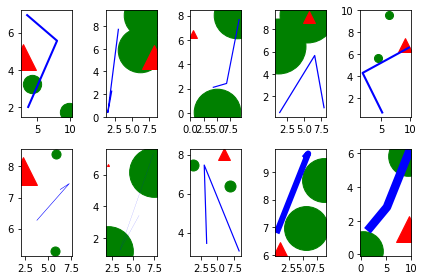

In [123]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(world.population[i].genome, small=True)

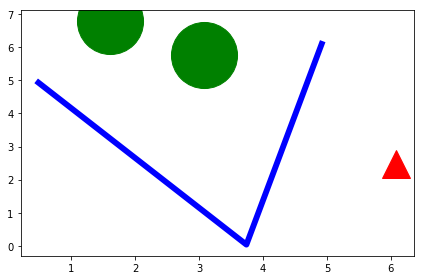

In [110]:
best = world.evolve(G = 10)
draw_face(best.genome)

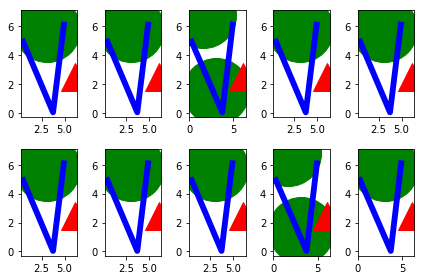

In [111]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(world.population[i].genome)

In [112]:
world.population[0].genome

array([3.08546392, 1.60949616, 5.77758118, 6.78652407, 6.60668428,
       6.08345985, 2.46519868, 2.88132302, 0.48910363, 3.74090168,
       4.91814315, 4.9279712 , 0.03845775, 6.09750306, 5.84358559])

In [113]:
world.population[1].genome

array([3.08546392, 1.60949616, 5.77758118, 6.78652407, 6.60668428,
       6.08345985, 2.46519868, 2.88132302, 0.48910363, 3.74090168,
       4.91814315, 4.9279712 , 0.03845775, 6.09750306, 5.84358559])

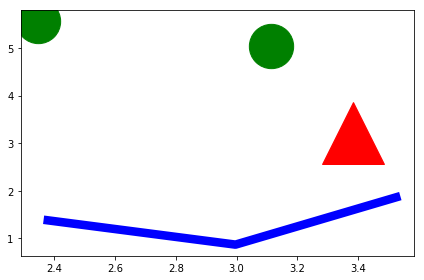

In [114]:
best = world.evolve(G = 1000)
draw_face(best.genome)

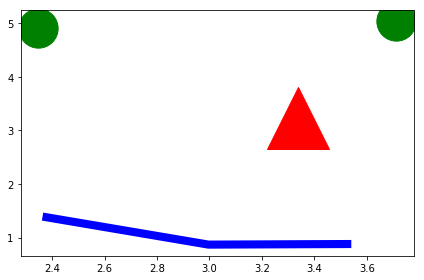

In [115]:
best = world.evolve(G = 1000)
draw_face(best.genome)

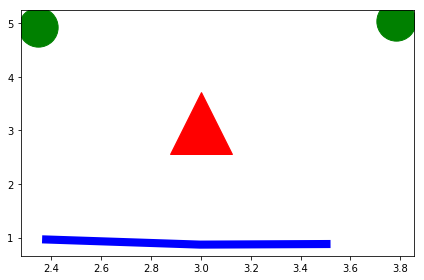

In [116]:
best = world.evolve(G = 1000)
draw_face(best.genome)

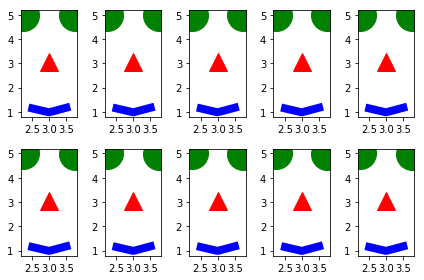

In [120]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    draw_face(world.population[i].genome, small=True)

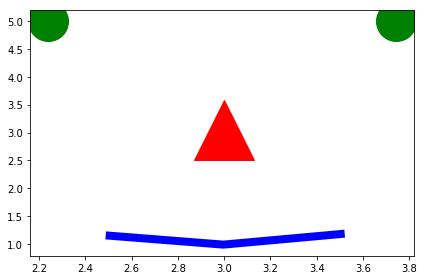

In [118]:
best = world.evolve(G = 10000)
draw_face(best.genome)

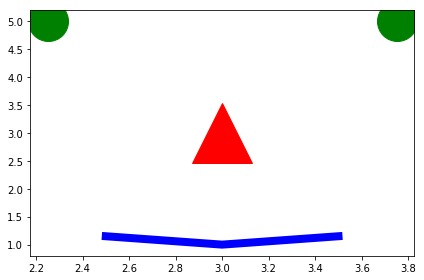

In [119]:
draw_face(target_gene)